In [1]:
import pandas as pd

In [2]:
# (1) Используя параметры pandas прочитать красиво пандас 
df = pd.read_csv('UCI_Credit_Card.csv') #TODO

In [3]:
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

              ...              BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
0             ...                    0.0        0.0        0.0       0.0   
1             ...                 3272.0     3455.0     3261.0       0.0   
2             ...                14331.0    14948.0    15549.0    1518.0   
3             ...                28314.0    28959.0    29547.0    2000.0   
4             ...                20940.0    19146.0    19131.0    2000.0   

   PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0     689.0       0.0       0.0       0.0       0.0   
1    1000.0    1000.0    1000.0       0.0    2000.0   
2    1500.0    1000.0    1000.0    1000.0    5000.0   
3    2019.0    1200.0    1100.0    1069.0    1000.0   
4   36681.0   10000.0    9000.0     689.0     679.0   

   default.payment.next.month  
0                           1  
1                           1  
2                           0  
3                           0  
4                           0  

[5 rows x 25 columns]

In [5]:
# (2) выведите, что за типы переменных, сколько пропусков,
# для численных значений посчитайте пару статистик (в свободной форме)

In [6]:
#TODO
print(df.info())
print(df.isnull().sum())

print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

In [7]:
# (3) посчитать число женщин с университетским образованием
# SEX (1 = male; 2 = female). 
# EDUCATION (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

#TODO

a = df.query('SEX == 2 and EDUCATION==2').shape
a[0]

8656

In [8]:
# (4) Сгрупировать по "default payment next month" и посчитать медиану для всех показателей начинающихся на BILL_ и PAY_
#TODO

a = ['default.payment.next.month','PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
df2 = df[a]
df2.groupby(['default.payment.next.month']).median()

PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  \
default.payment.next.month                                             
0                               0      0      0      0      0      0   
1                               1      0      0      0      0      0   

                            BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
default.payment.next.month                                               
0                             23119.5    21660.5    20202.5    19000.0   
1                             20185.0    20300.5    19834.5    19119.5   

                            BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
default.payment.next.month                                             
0                             17998.0    16679.0    2459.5    2247.5   
1                             18478.5    18028.5    1636.0    1533.5   

                            PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
default.payment.next.month                                          
0                             2000.0    1734.0    1765.0    1706.0  
1                             1222.0    1000.0    1000.0    1000.0

In [10]:
# (5) постройте сводную таблицу (pivot table) по SEX, EDUCATION, MARRIAGE

 #TODO
import numpy as np    
df.pivot_table(df,index=["SEX", 'EDUCATION', 'MARRIAGE'],aggfunc=np.mean)    

AGE      BILL_AMT1      BILL_AMT2  \
SEX EDUCATION MARRIAGE                                            
1   0         1         41.000000   11612.500000    4326.000000   
              2         36.500000   11051.666667   11051.666667   
    1         0         37.000000     298.000000     750.000000   
              1         42.423077   60196.886391   56841.282840   
              2         31.704899   54064.399164   52811.889480   
              3         44.533333   64661.733333   60919.266667   
    2         0         38.000000     176.000000     252.000000   
              1         40.332489   56465.218143   54125.950211   
              2         31.584354   50926.275850   48499.191837   
              3         40.698413   35491.222222   32247.698413   
    3         0         38.000000   26227.916667   31324.000000   
              1         44.338740   55910.685115   52443.879771   
              2         35.379195   45000.682327   43400.732662   
              3         47.722222   38469.972222   36403.472222   
    4         1         41.777778   76830.777778   60217.833333   
              2         28.173913   64118.739130   56253.086957   
              3         27.000000    3462.000000    1147.000000   
    5         1         39.354167  104611.791667   99782.916667   
              2         32.630435   74828.086957   70983.934783   
              3         44.000000   40199.000000   39218.000000   
    6         1         48.000000   78274.500000   67747.071429   
              2         40.363636   37394.545455   38328.818182   
2   0         1         37.500000   22374.500000   23274.000000   
              2         42.000000    7662.250000    4821.000000   
    1         0         36.333333    3148.666667    1785.333333   
              1         38.870571   44337.774114   43080.453248   
              2         30.158046   43004.106082   41783.862787   
              3         38.150000   55192.750000   41806.850000   
    2         0         35.800000   31881.400000   35419.200000   
              1         37.527504   54135.562835   51873.166145   
              2         30.405637   53866.076961   51843.868873   
              3         40.868687   43196.595960   40408.939394   
    3         0         38.218750   19299.093750   22961.125000   
              1         42.356315   45768.902372   44013.479316   
              2         36.240394   46695.179310   44834.025616   
              3         46.059701   35120.835821   34891.492537   
    4         1         37.941176   36574.382353   34017.352941   
              2         30.355556   58092.511111   50716.133333   
              3         40.500000     442.500000     649.000000   
    5         1         37.725490   79611.725490   75950.607843   
              2         32.234568   73882.592593   63430.012346   
              3         37.500000  121721.000000  114733.000000   
    6         1         45.000000   85957.571429   85063.785714   
              2         40.900000  111611.000000  110975.700000   
              3         42.000000  181866.000000  160283.000000   

                            BILL_AMT3      BILL_AMT4     BILL_AMT5  \
SEX EDUCATION MARRIAGE                                               
1   0         1           7871.000000   20295.500000   1926.500000   
              2          17312.500000   10767.333333   7372.166667   
    1         0            179.000000    1576.000000    497.000000   
              1          55180.526036   51360.938462  48348.436095   
              2          49665.841246   46617.539309  42545.724269   
              3          60893.433333   57469.500000  52784.100000   
    2         0              0.000000       0.000000      0.000000   
              1          51740.359494   47514.228270  44393.006329   
              2          45166.255782   41269.722449  37845.888435   
              3          32142.619048   25978.333333  21556.095238   
    3         0          18821.583333   

In [12]:
# (6) Создать новый строковый столбец в data frame-е, который:
# принимает значение A, если значение LIMIT_BAL <=10000
# принимает значение B, если значение LIMIT_BAL <=100000 и >10000
# принимает значение C, если значение LIMIT_BAL <=200000 и >100000
# принимает значение D, если значение LIMIT_BAL <=400000 и >200000
# принимает значение E, если значение LIMIT_BAL <=700000 и >400000
# принимает значение F, если значение LIMIT_BAL >700000

#TODO

df['new_col'] =pd.cut(df.LIMIT_BAL, [0, 10000, 100000, 200000,400000,700000,np.inf], labels=['A','B','C','D','E','F'])
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

    ...     BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  \
0   ...           0.0        0.0       0.0     689.0       0.0       0.0   
1   ...        3455.0     3261.0       0.0    1000.0    1000.0    1000.0   
2   ...       14948.0    15549.0    1518.0    1500.0    1000.0    1000.0   
3   ...       28959.0    29547.0    2000.0    2019.0    1200.0    1100.0   
4   ...       19146.0    19131.0    2000.0   36681.0   10000.0    9000.0   

   PAY_AMT5  PAY_AMT6  default.payment.next.month  new_col  
0       0.0       0.0                           1        B  
1       0.0    2000.0                           1        C  
2    1000.0    5000.0                           0        B  
3    1069.0    1000.0                           0        B  
4     689.0     679.0                           0        B  

[5 rows x 26 columns]

In [38]:
%matplotlib inline

In [ ]:
# (7) постироить распределение LIMIT_BAL (гистрограмму)

In [13]:
#TODO

import matplotlib.pyplot as plt

plt.figure();
df['LIMIT_BAL'].hist()

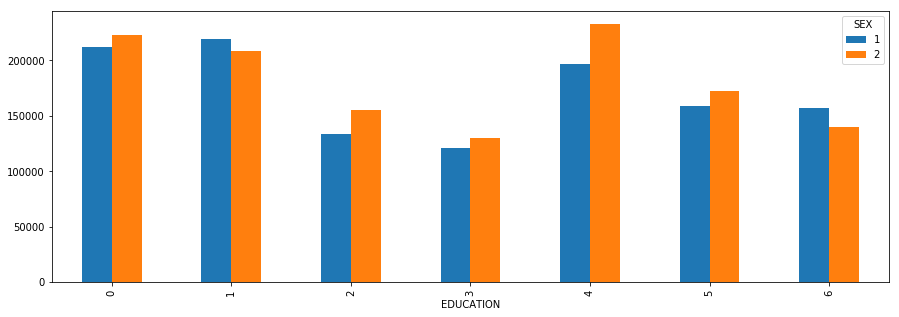

In [14]:
# (8) построить зависимость кредитного лимита от образования для каждого пола
# график необходимо сделать очень широким (на весь экран)
#TODO

    
var = df.groupby(['EDUCATION','SEX']).LIMIT_BAL.mean()
var.unstack().plot(kind='bar', grid=False, figsize=(15, 5))

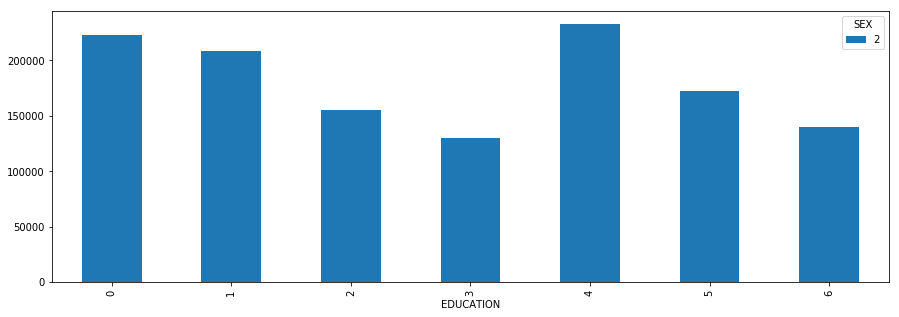

In [15]:
# (9) построить зависимость кредитного лимита и образования только для одного из полов

#TODO

var2 = df.query('SEX == 2').groupby(['EDUCATION','SEX']).LIMIT_BAL.mean()

var2.unstack().plot(kind='bar', grid=False, figsize=(15, 5))

/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


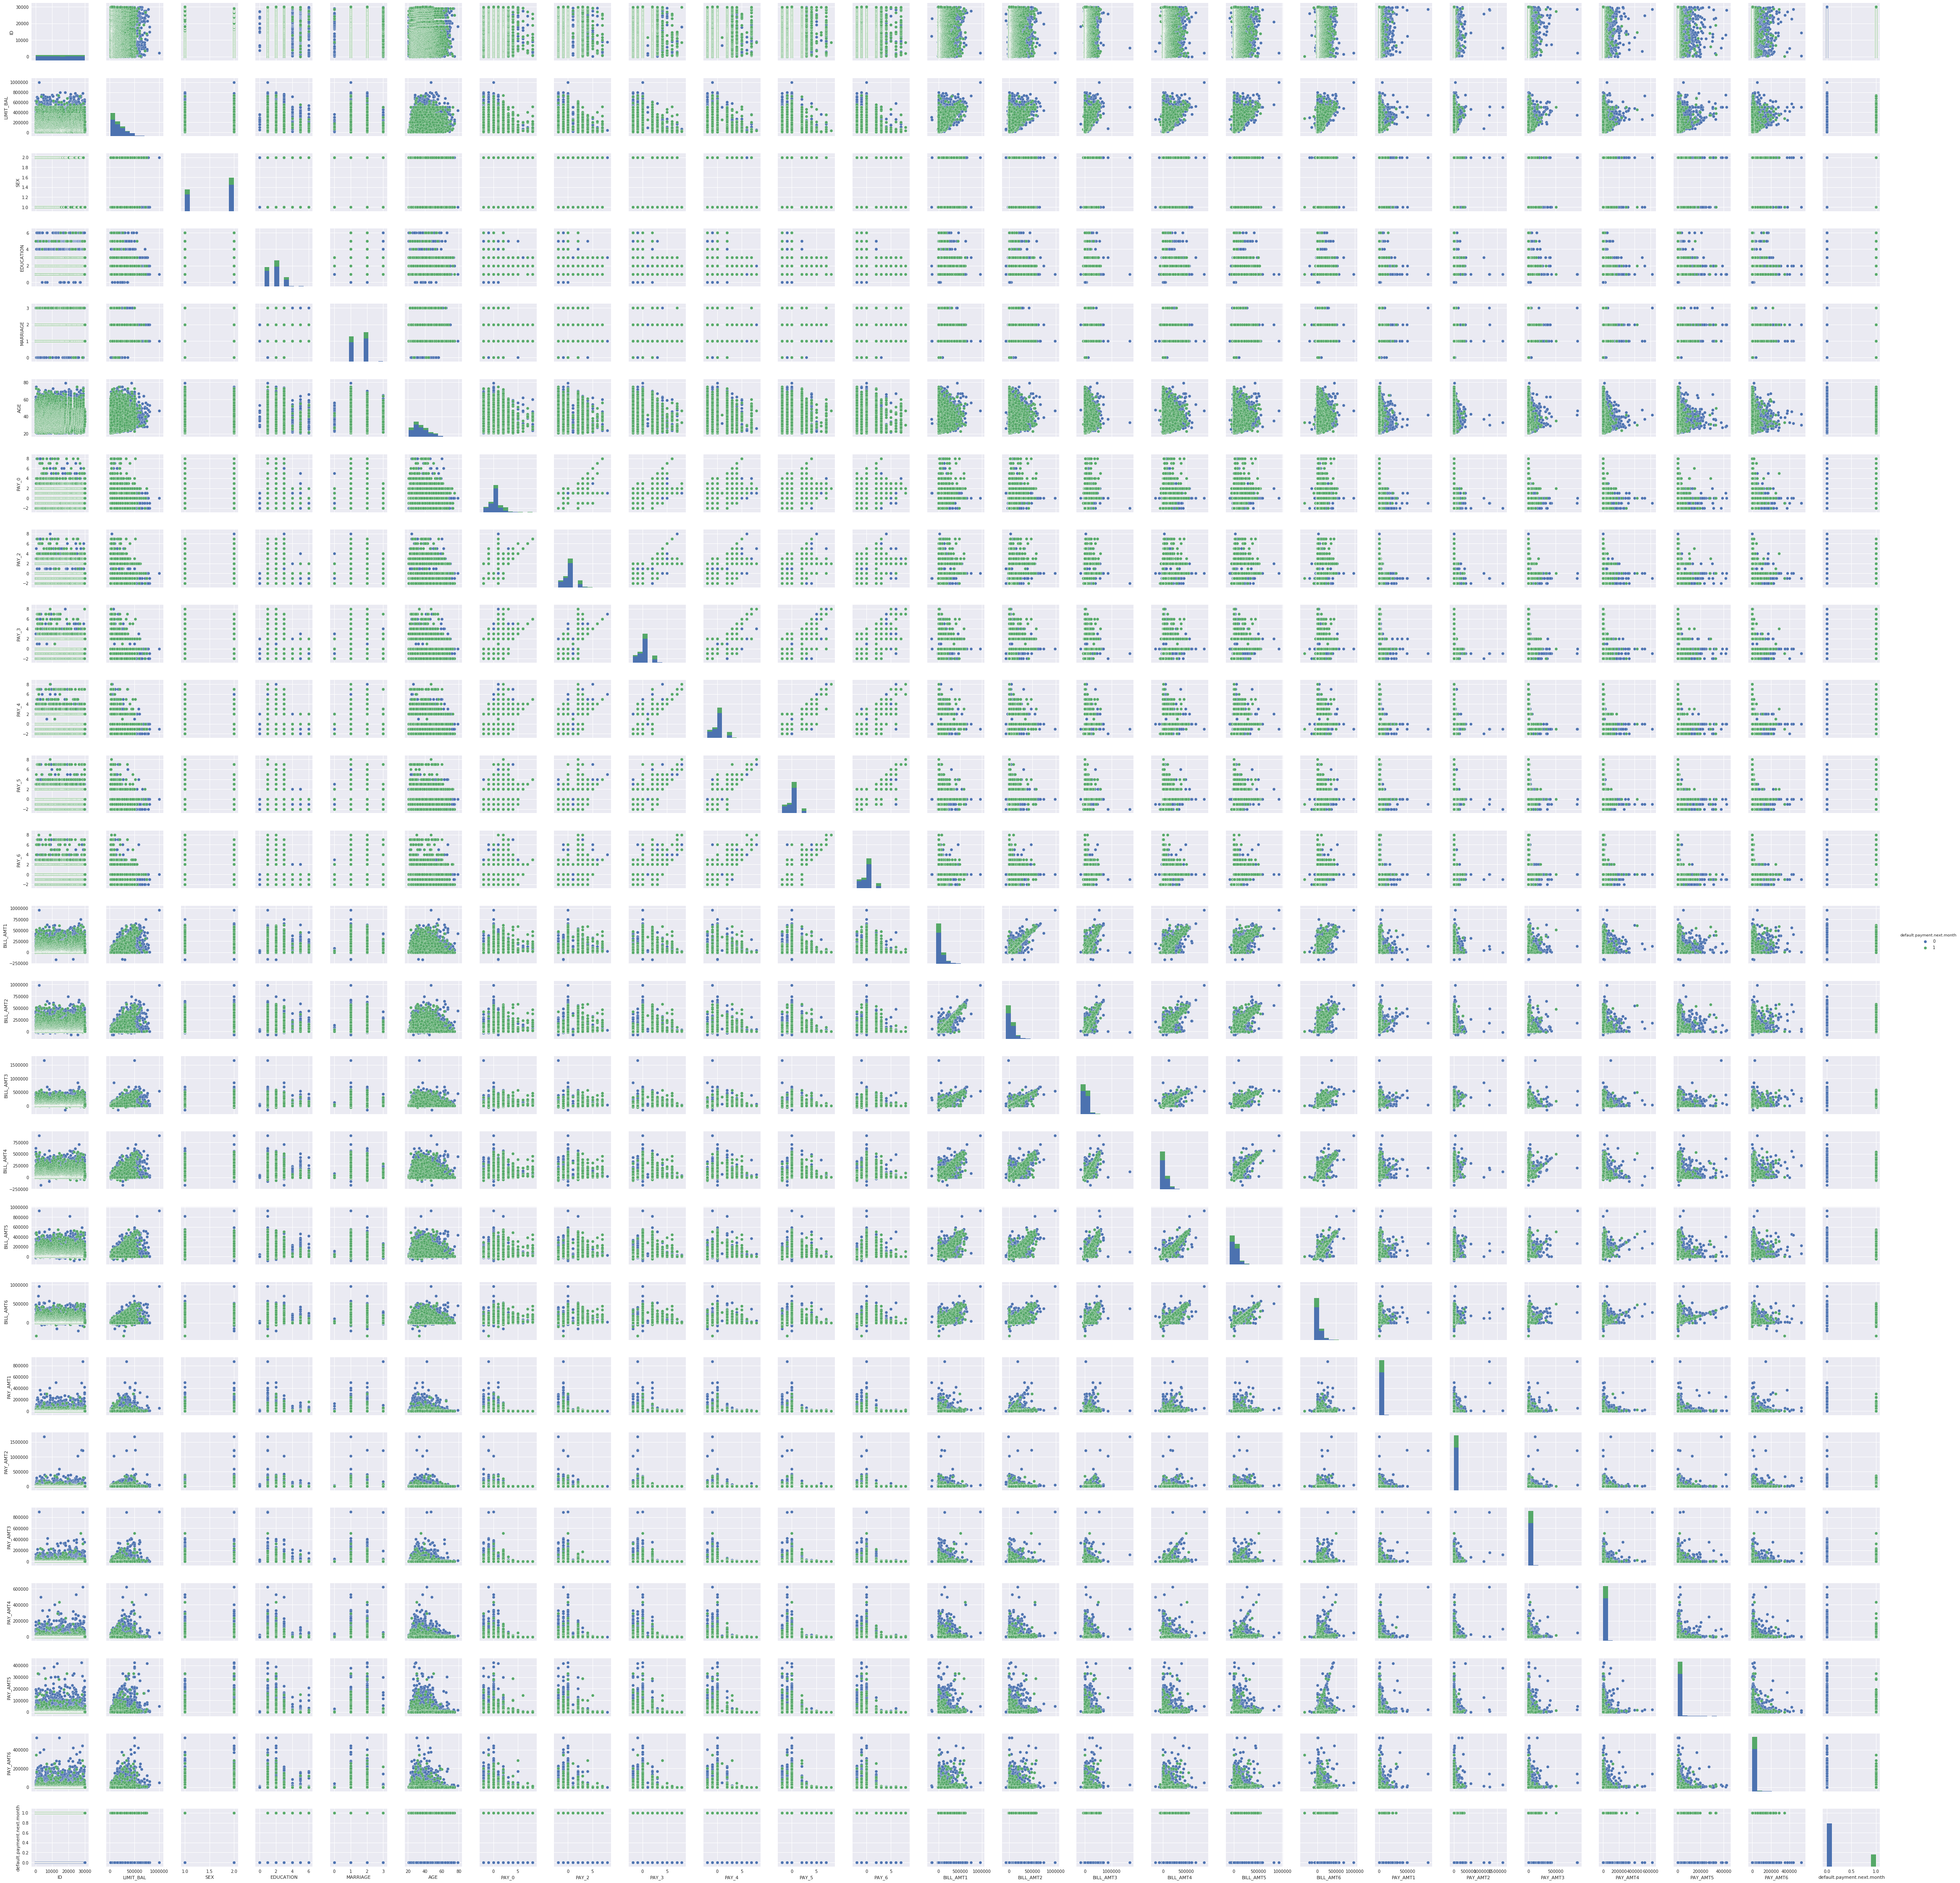

In [17]:
# (10) построить большой график (подсказка - используя seaborn) для построения завимисости всех возможных пар параметров
# разным цветом выделить разные значение "default payment next month"
# (но так как столбцов много - картинка может получиться "монструозной")
# (поэкспериментируйте над тем как построить подобное сравнение параметров)
# (подсказка - ответ может состоять из несколькольких графиков)
# (если не выйдет - программа минимум - построить один график со всеми параметрами)
import seaborn as sns

#TODO

sns.pairplot(df, hue='default.payment.next.month')